## Overall variance

Words with the highest overall variance in the smoothed time series data. Captures words that dramatically increase, decrease, spike, or fluctuate:

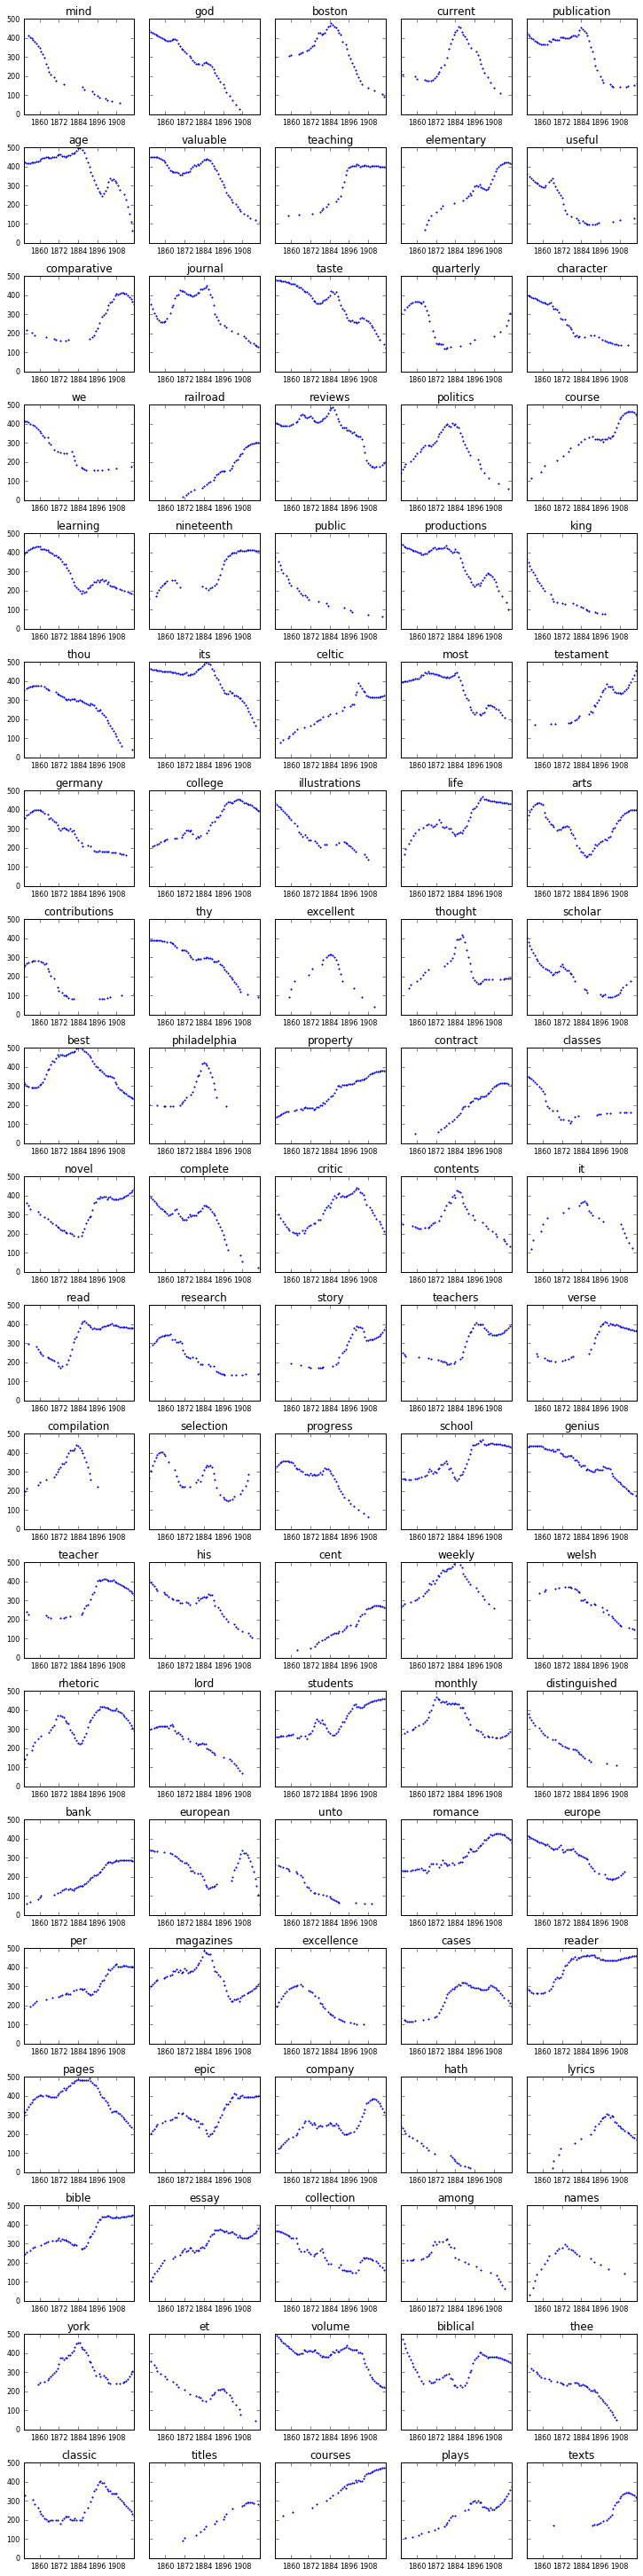

In [1]:
import numpy as np

from hol.topn_series import TopnSeries

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

years = range(1850, 1920)
depth = 500

topns = TopnSeries(years, depth, level1=5)

def print_query(_lambda, rows=20, cols=5, figsize=(10, 40)):
    
    result = topns.sort(_lambda)
    topn = list(result.items())[:100]
    
    y1 = list(years)[0]
    y2 = list(years)[-1]
    
    fig, axarr = plt.subplots(rows, cols, figsize=figsize, sharey='row')
    fig.tight_layout(pad=0, h_pad=2, w_pad=0.1)
    
    for i, row in enumerate(axarr):
        for j, ax in enumerate(row):

            t, (s, v) = topn[(i*5)+j]
            ax.set_title(t)
            ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
            ax.tick_params(labelsize=8)
            ax.set_xlim(y1, y2)
            ax.set_ylim(0, depth)
            ax.plot(*zip(*s.items()), linestyle='none', marker=".", markersize=3)

def score(s):
    return np.var(list(s.values()))

print_query(score)

## Trending up

Words that show the largest overall increase in rank over time:

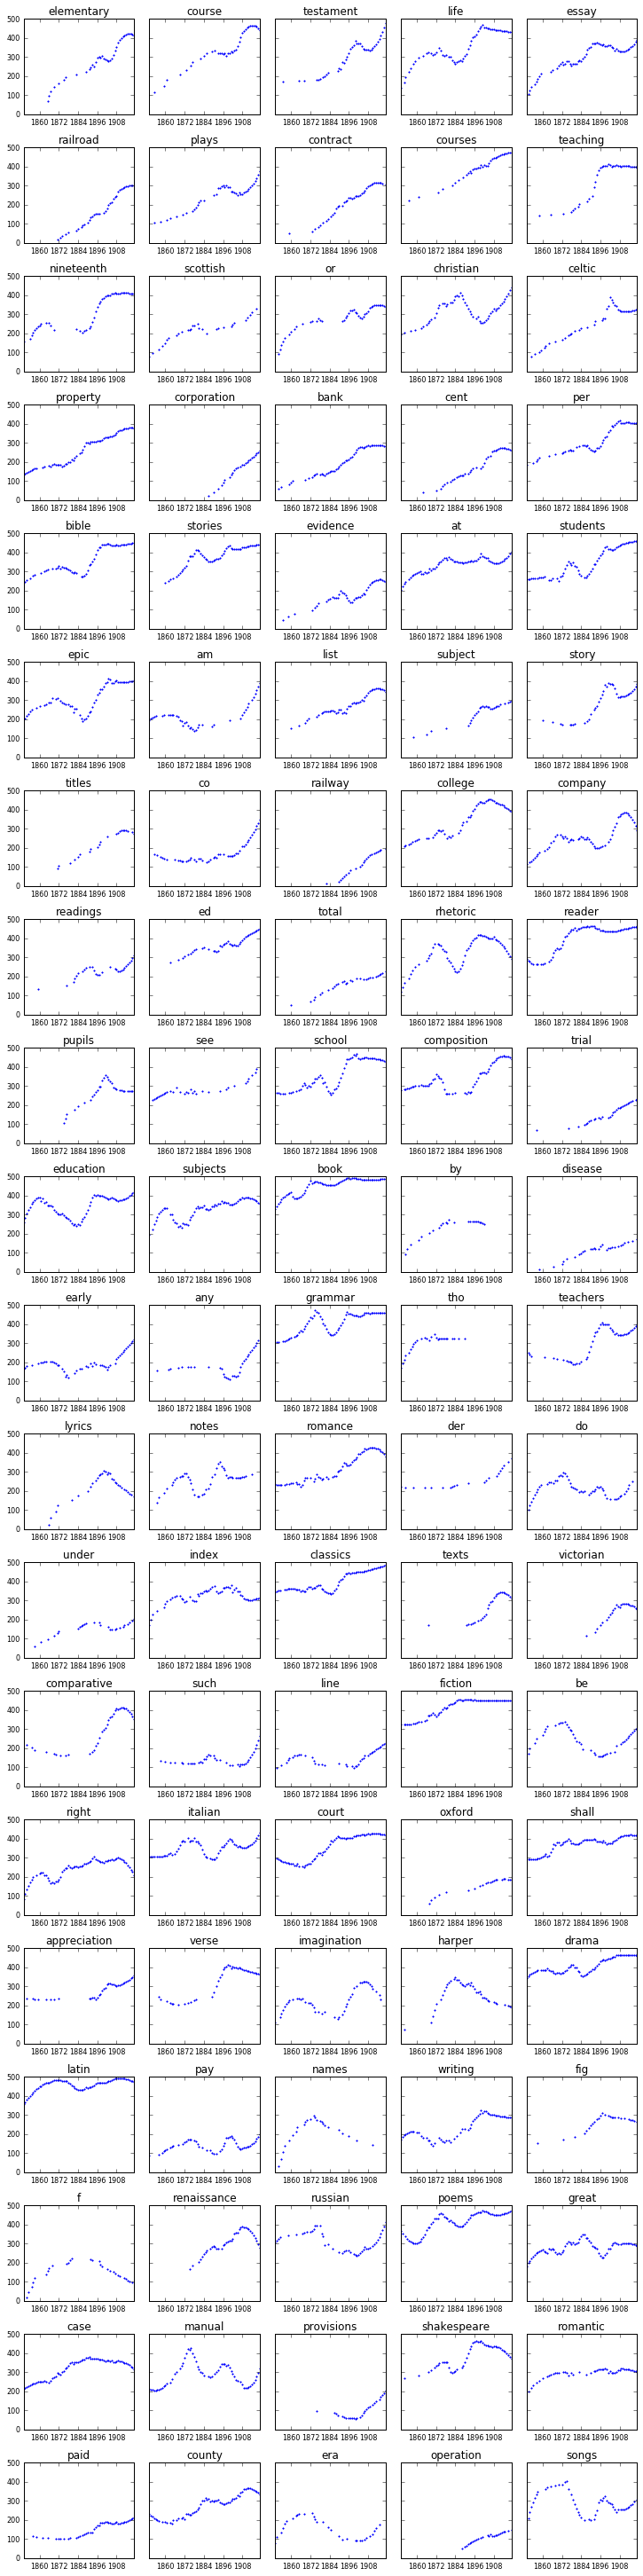

In [2]:
def score(s):
    y = list(s.values())
    return y[-1] - y[0]

print_query(score)

## Trending down

Words that show the largest overall decrease in rank over time:

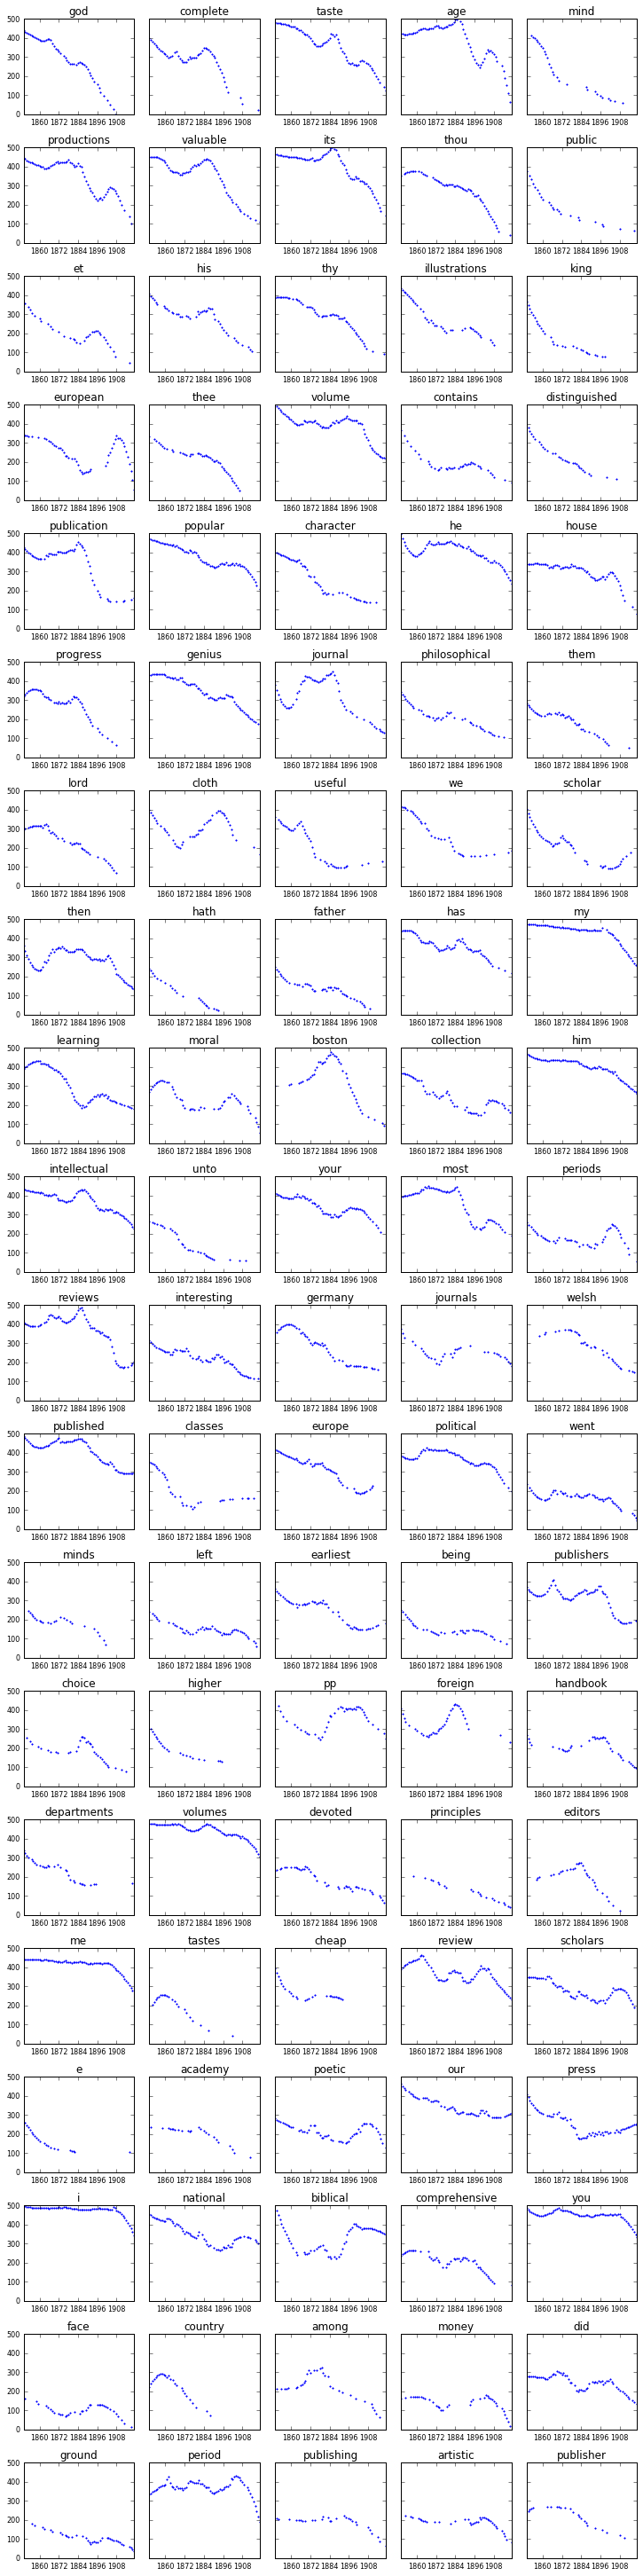

In [3]:
def score(s):
    y = list(s.values())
    return y[0] - y[-1]

print_query(score)

## Constant

Words that stay in the same place in the rankings over time:

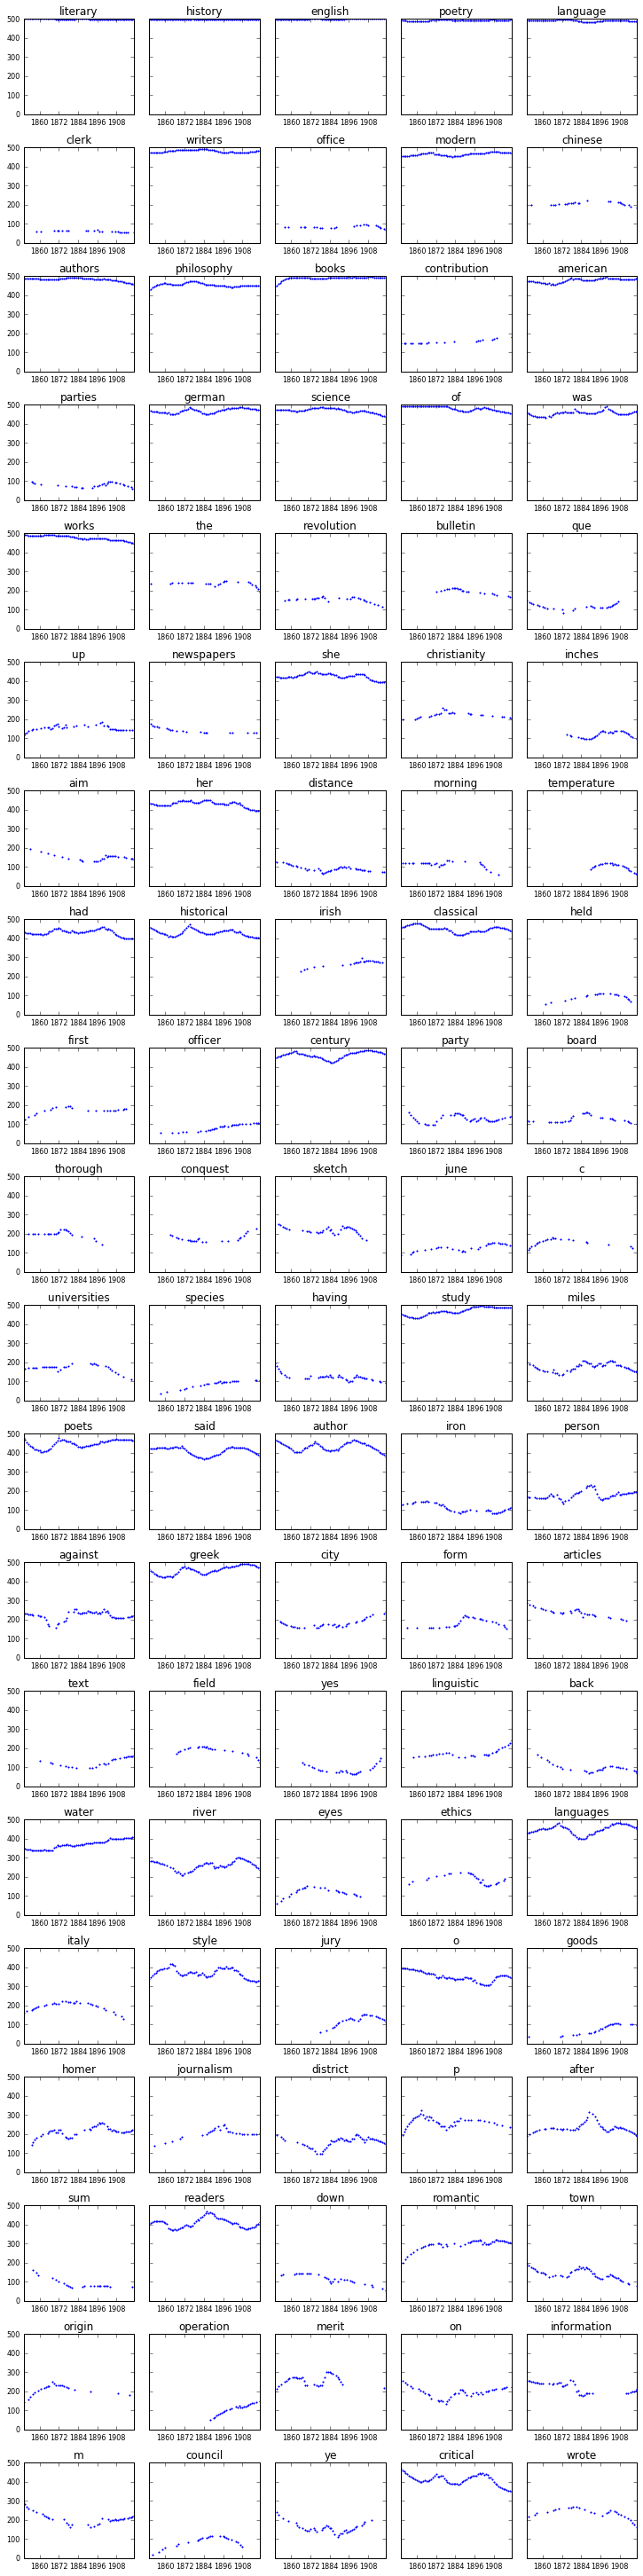

In [4]:
def score(s):
    return -np.var(list(s.values()))

print_query(score)

## Over all rate of change in MDWs

- Slide a 20-year window across the year range;
- In each window, compute the average edit distance for all pairs of MDW lists;
- Anchor this value to the center of the window.

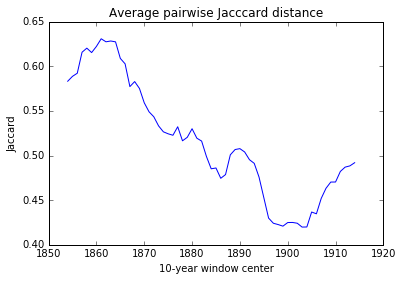

In [5]:
import math

from distance import jaccard
from itertools import combinations

from hol.utils import window

avg_window_dist = {}
for w in window(range(1850, 1920), 10):
    
    ds = []
    for y1, y2 in combinations(w, 2):
        y1_tn = list(topns.topns[y1].keys())
        y2_tn = list(topns.topns[y2].keys())
        ds.append(jaccard(y1_tn, y2_tn))
        
    center = math.floor((w[0] + w[-1])/2)
    
    avg_window_dist[center] = sum(ds) / len(ds)
    
plt.title('Average pairwise Jacccard distance')
plt.xlabel('10-year window center')
plt.ylabel('Jaccard')
plt.plot(*zip(*avg_window_dist.items()))

## Time series -> density functions

Convert the rank time series into PDFs:

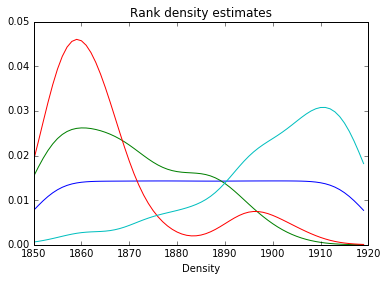

In [10]:
def plot_pdfs(tokens, years):
    for t in tokens:
        
        pdf = topns.rank_pdf(t, bandwidth=5)
        samples = [np.exp(pdf.score(y)) for y in years]
        
        plt.plot(years, samples, label=t)
        plt.title('Rank density estimates')
        plt.xlabel('Year')
        plt.xlabel('Density')
        # plt.legend(loc='upper right')
        
    plt.show()
    
plot_pdfs(
    ['history', 'god', 'mind', 'course'],
    range(1850, 1920),
)

['contributions', 'classes', 'studied', 'quarterly', 'colleges', 'et', 'models', 'era', 'departments', 'ideas', 'creative', 'attractive', 'away', 'father', 'useful', 'again', 'son', 'scott', 'original', 'illustrations', 'mental', 'go', 'excellence', 'we', 'choice', 'geometry', 'artistic', 'h', 'x', 'n', 'compilation', 'among', 'philosophical', 'historian', 'devoted', 'instruction', 'entertaining', 'france', 'them', 'universities', 'research', 'over', 'revival', 'italy', 'scholar', 'motion', 'face', 'printed', 'information', 'm', 'articles', 'being', 'officers', 'selected', 'lord', 'came', 'moral', 'class', 'iron', 'air', 'merit', 'money', 'comprehensive', 'historians', 'ye', 'see', 'society', 'journals', 'civilization', 'saw', 'elements', 'legends', 'up', 'left', 'ground', 'selection', 'handbook', 'thee', 'standard', 'collection', 'his', 'living', 'character', 'chronicle', 'physics', 'vol', 'recent', 'sciences', 'department', 'foreign', 'practical', 'price', 'scholarship', 'distance', 

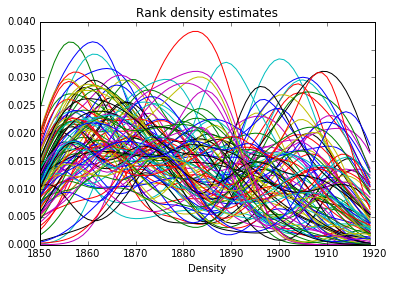

['elements', 'face', 'among', 'thought', 'italy', 'scott', 'handbook', 'articles', 'choice', 'chronicle', 'cause', 'board', 'pupils', 'era', 'payment', 'compilation', 'geometry', 'et', 'lyrics', 'sketch', 'universities', 'current', 'departments', 'air', 'journals', 'see', 'music', 'is', 'instruction', 'merit', 'elementary', 'such', 'welsh', 'lessons', 'colleges', 'story', 'artistic', 'recent', 'inches', 'vol', 'head', 'instructor', 'contents', 'distance', 'foreign', 'ye', 'harper', 'cloth', 'officer', 'politics', 'living', 'studied', 'historians', 'road', 'plays', 'teaching', 'department', 'x', 'boston', 'n', 'comprehensive', 'price', 'models', 'surface', 'having', 'estate', 'courses', 'entertaining', 'notes', 'june', 'acid', 'them', 'information', 'selection', 'practical', 'philosophical', 'be', 'course', 'contract', 'father', 'any', 'physics', 'france', 'teacher', 'up', 'selected', 'evidence', 'celtic', 'his', 'over', 'expression', 'arnold', 'party', 'weekly', 'excellence', 'teachers

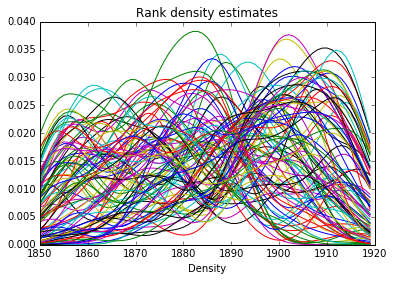

['recent', 'any', 'railroad', 'x', 'studied', 'lyrics', 'cent', 'trial', 'selected', 'june', 'pupils', 'money', 'creative', 'section', 'payment', 'scott', 'officer', 'comparative', 'over', 'instructor', 'spirit', 'colleges', 'such', 'legends', 'inches', 'physics', 'celtic', 'mental', 'geometry', 'elementary', 'music', 'am', 'line', 'paid', 'contract', 'ideas', 'ground', 'testament', 'co', 'upon', 'story', 'universities', 'face', 'appreciation', 'renaissance', 'surface', 'course', 'teaching', 'evidence', 'imagination', 'articles', 'estate', 'notes', 'road', 'religion', 'plays', 'cause', 'city', 'courses', 'or', 'early', 'acid', 'pay', 'attractive', 'periods', 'choice', 'lessons', 'london', 'teacher', 'vol', 'historian', 'be', 'expression', 'artistic', 'see', 'm', 'in', 'verse', 'moral', 'bank', 'nineteenth', 'pp', 'ed', 'sketch', 'head', 'current', 'eighteenth', 'district', 'action', 'era', 'state', 'having', 'european', 'officers', 'list', 'wife', 'scholarship', 'land', 'russian', 'h']

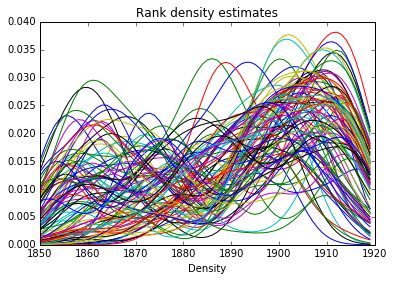

In [14]:
from collections import OrderedDict

from hol.utils import sort_dict

def rank_by_density(years):
    
    result = OrderedDict()
    
    for t in topns.tokens():
        
        count = 0
        for year, ranks in topns.topns.items():
            if t in ranks:
                count += 1
                
        if count > 30:
            
            try:
                pdf = topns.rank_pdf(t)
                vals = [np.exp(pdf.score(y)) for y in years]
                result[t] = max(vals)

            except:
                pass
    
    return sort_dict(result)

ranks = rank_by_density(range(1850, 1875))
print(list(ranks.keys())[:100])
plot_pdfs(list(ranks.keys())[:100], range(1850, 1920))

ranks = rank_by_density(range(1875, 1900))
print(list(ranks.keys())[:100])
plot_pdfs(list(ranks.keys())[:100], range(1850, 1920))

ranks = rank_by_density(range(1900, 1925))
print(list(ranks.keys())[:100])
plot_pdfs(list(ranks.keys())[:100], range(1850, 1920))